### Keras Tuner
install Keras Tuner package

In [1]:
%pip install keras-tuner

#### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('CANCER.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 33)

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.drop(columns=['Unnamed: 32'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Check value counts for cancer patients

In [7]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: title={'center': 'Count Plot For Diagnosis'}, xlabel='diagnosis'>

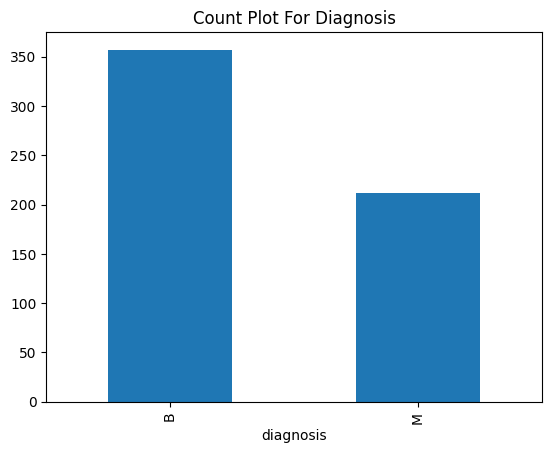

In [8]:
df['diagnosis'].value_counts().plot(kind='bar',title='Count Plot For Diagnosis')

#### Replace B with 0 and M with 1

In [9]:
df['diagnosis'] = df['diagnosis'].replace({'B':0,'M':1})

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

#### Separate values of X and Y

In [12]:
x = df.drop(columns=['id','diagnosis'])
y = df[['diagnosis']]

In [13]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [15]:
x.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

#### Create a preprocessing pipeline for x

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [18]:
x_pre = num_pipe.fit_transform(x)
x_pre

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [19]:
cols = num_pipe.get_feature_names_out()
cols

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [20]:
x_pre = pd.DataFrame(x_pre,columns=cols)

In [21]:
x_pre.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [23]:
xtrain.shape

(455, 30)

In [24]:
xtest.shape

(114, 30)

In [25]:
xtrain.shape[1]

30

#### Create a function for keras tuner

In [27]:
from keras.models import Sequential
from keras.layers import Dense
 

In [34]:
def build_model(hp):
    # Initialize Sequential model
    model = Sequential()
    
    # Define Hyper-parameters
    hp_units1 = hp.Int('units1',min_value=32,max_value=512,step=32)
    hp_units2 = hp.Int('units2',min_value=32,max_value=512,step=32)
    hp_units3 = hp.Int('units3',min_value=32,max_value=512,step=32)
    
    # Hidden Layer 1
    model.add(Dense(units=hp_units1,input_dim=xtrain.shape[1],activation='relu'))
    # Hidden Layer 2
    model.add(Dense(units=hp_units2,activation='relu'))
    # Hidden Layer 3
    model.add(Dense(units=hp_units3,activation='relu'))
    # Output Layer
    model.add(Dense(units=1,activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])
    return model

#### Make use of keras tuner to optimize number of neurons

In [35]:
import keras_tuner as kt

In [36]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=20,
                     directory='keras_tuner_dir',
                     project_name='cancer_classification')

In [37]:
tuner.search(xtrain,ytrain,epochs=30,validation_split=0.2)

Trial 30 Complete [00h 00m 04s]
val_loss: 0.09153863787651062

Best val_loss So Far: 0.044367533177137375
Total elapsed time: 00h 01m 42s


#### Get best hyper parameters

In [38]:
tuner.get_best_hyperparameters()[0]

In [39]:
tuner.get_best_hyperparameters()[0].get('units1')

416

In [40]:
tuner.get_best_hyperparameters()[0].get('units2')

320

In [42]:
tuner.get_best_hyperparameters()[0].get('units3')

448

#### Get best model

In [43]:
best_nn = tuner.get_best_models()[0]

In [44]:
best_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 416)               12896     
                                                                 
 dense_1 (Dense)             (None, 320)               133440    
                                                                 
 dense_2 (Dense)             (None, 448)               143808    
                                                                 
 dense_3 (Dense)             (None, 1)                 449       
                                                                 
Total params: 290593 (1.11 MB)
Trainable params: 290593 (1.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Evaluate model on train and test

In [45]:
best_nn.evaluate(xtrain,ytrain)

15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9978


[0.011142928153276443, 0.997802197933197]

In [46]:
best_nn.evaluate(xtest,ytest)

4/4 [==============================] - 0s 4ms/step - loss: 0.1204 - accuracy: 0.9649


[0.12040442228317261, 0.9649122953414917]

#### Predict results for train and test

In [47]:
yprob_tr = best_nn.predict(xtrain)
yprob_ts = best_nn.predict(xtest)

4/4 [==============================] - 0s 2ms/step


In [48]:
yprob_tr[0:5]

array([[9.1527323e-07],
       [1.0000000e+00],
       [5.6810256e-10],
       [2.5430311e-02],
       [1.8247832e-08]], dtype=float32)

In [49]:
yprob_ts[0:5]

array([[1.5043506e-02],
       [1.0000000e+00],
       [9.9999923e-01],
       [2.5035422e-06],
       [1.1933160e-07]], dtype=float32)

In [50]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr.flatten()]
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts.flatten()]

In [51]:
ypred_tr[0:5]

[0, 1, 0, 0, 0]

In [52]:
ytrain.head()

,diagnosis
68,0
181,1
63,0
248,0
60,0


In [53]:
ypred_ts[0:5]

[0, 1, 1, 0, 0]

In [54]:
ytest.head()

,diagnosis
204,0
70,1
131,1
431,0
540,0


#### Check the confusion matrix for test

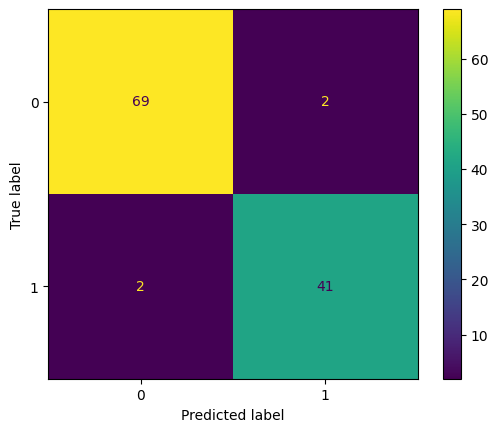

In [55]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

#### check classification report on test

In [56]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



#### Save the cancer model

In [57]:
best_nn.save('CancerModel.keras')

#### Loading the model

In [58]:
from keras.models import load_model
model = load_model('CancerModel.keras')

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 416)               12896     
                                                                 
 dense_1 (Dense)             (None, 320)               133440    
                                                                 
 dense_2 (Dense)             (None, 448)               143808    
                                                                 
 dense_3 (Dense)             (None, 1)                 449       
                                                                 
Total params: 290593 (1.11 MB)
Trainable params: 290593 (1.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
